# K-means Clustering
#### Name: 沈家駿
#### Student ID: 0712223

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sklearn.metrics
from sklearn.decomposition import PCA

## Data Input

In [2]:
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Data Preprocessing
### Divide the data into X(features) and y(labels).

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Shuffle the data.

In [4]:
X, y = shuffle(X, y)
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

### normalization(Z-score)

In [5]:
X_np = X.to_numpy()
X_standard = (X_np-X_np.mean(axis=0))/X_np.std(axis=0)

## K-means Clustering
### Implement of the K-means from scratch

In [6]:
def kmeans(X, num_clusters, cnt=10000, need_prototypes=False):
    N, D = X.shape

    prototypes = np.random.random([num_clusters,D])

    previous_indices = np.empty(N)

    while True:   
        dist_sq_sum = np.empty([N,num_clusters])

        for i in range(num_clusters):
            dist_sq_sum[:,i] = np.sum(np.square(X-prototypes[i,:]),axis=1)

        cluster_indices = dist_sq_sum.argmin(axis=1)

        for i in range(num_clusters):
            prototypes[i,:]=np.mean(X[(cluster_indices==i),:],axis=0)

        # Stopping criteria
        cnt -= 1
        if np.array_equal(previous_indices, cluster_indices) or cnt < 0:
            if need_prototypes:
                return previous_indices, prototypes
            else:
                return previous_indices
        else:
            previous_indices = cluster_indices

### Call the k-means function

In [7]:
y_pred = kmeans(X_standard, num_clusters=3)

### Change the lable of y_pred

In [8]:
y_pred = pd.Series(y_pred)

In [9]:
mask_0 = (y_pred == 0)
mask_1 = (y_pred == 1)
mask_2 = (y_pred == 2)

In [10]:
max_lable = [1, 2, 3]
max_acc = 0
y_pred_copy = y_pred.copy()

for i in range(1, 5):
    for j in range(1, 4):
        for k in range(1, 4):
            if i != j and j != k and i != k:
                y_pred_copy[mask_0] = i
                y_pred_copy[mask_2] = j
                y_pred_copy[mask_1] = k
                
                temp_acc = (y_pred_copy == y).sum()/y.shape[0]
                if temp_acc > max_acc:
                    max_acc = temp_acc
                    max_lable = [i, j, k]
                    y_pred[mask_0] = i
                    y_pred[mask_2] = j
                    y_pred[mask_1] = k

## Results 

In [11]:
cm = sklearn.metrics.confusion_matrix(y, y_pred).transpose()
acc = sklearn.metrics.accuracy_score(y, y_pred)
precision, recall, _, _ = sklearn.metrics.precision_recall_fscore_support(y, y_pred)

### Define a function to show the metrics

In [12]:
def show_metrics(metrics, lable):
    cm, acc, pc, recall = metrics
    num_classes = pc.size
    cm_row = list(map(lambda x: 'Predicted '+x, list(lable)))
    cm_col = list(map(lambda x: 'Actual '+x, list(lable)))
    
    display(pd.DataFrame(cm, index=cm_row, columns=cm_col))
    display(pd.DataFrame([acc], index=['Accuracy'], columns=['Avg.']))
    display(pd.DataFrame(pc.reshape(1, num_classes), index=['Precision'], columns=lable))
    display(pd.DataFrame(recall.reshape(1, num_classes), index=['Recall'], columns=lable))

### show the metrics

In [13]:
show_metrics((cm, acc, precision, recall), ['1', '2', '3'])

,Actual 1,Actual 2,Actual 3
Predicted 1,62,5,4
Predicted 2,2,65,0
Predicted 3,6,0,66


,Avg.
Accuracy,0.919048


,1,2,3
Precision,0.873239,0.970149,0.916667


,1,2,3
Recall,0.885714,0.928571,0.942857


## Comparison & Conclusion
- K-means Clustering is a unsupervised machine learning algorithms, it doesn't need target data.
- It's simple(easy to implement it and no need for hyperparameters) but powerful.

## Questions
> Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance.

In [14]:
pca = PCA(n_components=2)
pca.fit(X_standard)
X_2d = pca.transform(X_standard)

In [15]:
y_pred, pro = kmeans(X_2d, num_clusters=3, need_prototypes=True)

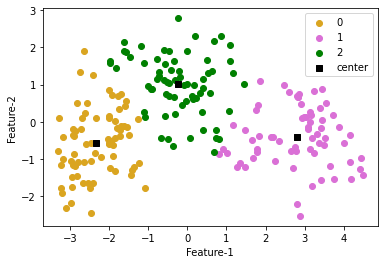

In [16]:
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1

pts1 = plt.scatter(X_2d[pd.Series(y_pred)==0, 0], X_2d[pd.Series(y_pred)==0, 1], c='goldenrod', alpha=1)
pts2 = plt.scatter(X_2d[pd.Series(y_pred)==1, 0], X_2d[pd.Series(y_pred)==1, 1], c='orchid', alpha=1)
pts3 = plt.scatter(X_2d[pd.Series(y_pred)==2, 0], X_2d[pd.Series(y_pred)==2, 1], c='green', alpha=1)
centers = plt.scatter(pro[:, 0], pro[:, 1], c='black', alpha=1, marker='s')
plt.xlabel("Feature-1",fontsize=10)
plt.ylabel("Feature-2",fontsize=10)
plt.legend([pts1, pts2, pts3, centers], ['0','1', '2', 'center'])